# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
def weather(city, units='imperial'):
    base_url="http://api.openweathermap.org/data/2.5/weather?"
    q_url = f"{base_url}appid={api_key}&units={units}&q={city}" 
    data = requests.get(q_url).json()
    return data

In [5]:
weathers_df = pd.DataFrame({"City": cities})
weathers_df["Lat"] = ""
weathers_df["Lng"] = ""
weathers_df["Max Temp"] = ""
weathers_df["Humidity"] = ""
weathers_df["Cloudiness"] = ""
weathers_df["Wind Speed"] = ""
weathers_df["Country"] = ""
weathers_df["Date"] = ""

In [6]:
count = 0

for index, row in weathers_df.iterrows():
    data = weather(city)
    city=row["City"]
    try:
        weathers_df.loc[index, "Lat"] = data['coord']['lat']
        weathers_df.loc[index, "Lng"] = data['coord']['lon']
        weathers_df.loc[index, "Max Temp"] = data['main']['temp_max']
        weathers_df.loc[index, "Humidity"] = data['main']['humidity']
        weathers_df.loc[index, "Cloudiness"] = data['clouds']['all']
        weathers_df.loc[index, "Wind Speed"] = data['wind']['speed']
        weathers_df.loc[index, "Country"] = data['sys']['country']
        weathers_df.loc[index, "Date"] = data['dt']
        count += 1
        print(f"Processing city number{count} :  {city} ")
    except:
        print(f"{city} not found... skipping.....")
        pass
     

Processing city number1 :  atuona 
Processing city number2 :  busselton 
Processing city number3 :  alamosa 
Processing city number4 :  port hawkesbury 
Processing city number5 :  sao filipe 
Processing city number6 :  broken hill 
Processing city number7 :  new norfolk 
Processing city number8 :  mufumbwe 
Processing city number9 :  amderma 
palabuhanratu not found... skipping.....
kodiak not found... skipping.....
Processing city number10 :  lima 
Processing city number11 :  provideniya 
Processing city number12 :  mataura 
Processing city number13 :  port shepstone 
Processing city number14 :  hasaki 
Processing city number15 :  babina 
Processing city number16 :  illoqqortoormiut 
jamestown not found... skipping.....
Processing city number17 :  kapaa 
Processing city number18 :  coos bay 
Processing city number19 :  hermanus 
Processing city number20 :  rio grande 
Processing city number21 :  shingu 
Processing city number22 :  batemans bay 
Processing city number23 :  port alfred 

Processing city number194 :  berlevag 
Processing city number195 :  ketchikan 
Processing city number196 :  tamiahua 
Processing city number197 :  ati 
Processing city number198 :  cidreira 
Processing city number199 :  formoso do araguaia 
vanavara not found... skipping.....
Processing city number200 :  nanortalik 
Processing city number201 :  sorvag 
tsihombe not found... skipping.....
tacuarembo not found... skipping.....
Processing city number202 :  susehri 
Processing city number203 :  axim 
Processing city number204 :  grand river south east 
nadym not found... skipping.....
Processing city number205 :  baglung 
Processing city number206 :  camocim 
Processing city number207 :  capitao poco 
Processing city number208 :  shizunai 
Processing city number209 :  kondagaon 
Processing city number210 :  bhatkal 
Processing city number211 :  ust-tsilma 
Processing city number212 :  yar-sale 
Processing city number213 :  aklavik 
Processing city number214 :  olafsvik 
Processing city num

Processing city number385 :  jardim 
Processing city number386 :  tarudant 
palatka not found... skipping.....
Processing city number387 :  fairbanks 
Processing city number388 :  ilinskiy 
Processing city number389 :  kidal 
Processing city number390 :  katsiveli 
oksfjord not found... skipping.....
Processing city number391 :  manali 
Processing city number392 :  maningrida 
Processing city number393 :  blagoyevo 
Processing city number394 :  balad 
Processing city number395 :  sinnamary 
Processing city number396 :  batagay-alyta 
Processing city number397 :  san policarpo 
Processing city number398 :  kegayli 
mabaruma not found... skipping.....
Processing city number399 :  quatre cocos 
Processing city number400 :  yizheng 
Processing city number401 :  buta 
Processing city number402 :  mapastepec 
Processing city number403 :  mariental 
Processing city number404 :  erzin 
Processing city number405 :  broome 
Processing city number406 :  bhawanipatna 
Processing city number407 :  

In [7]:
weathers_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-46.19,168.86,66,49,86,5.01,NZ,1603329840
1,busselton,-9.8,-139.03,77.95,71,0,16.26,PF,1603329840
2,alamosa,-33.65,115.33,60.01,66,9,3,AU,1603329641
3,port hawkesbury,37.47,-105.87,57.2,12,1,13.87,US,1603329840
4,sao filipe,45.62,-61.35,54,100,90,9.17,CA,1603329840


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weathers_df.to_csv("cities.csv")

In [28]:
cities_pd = pd.read_csv("cities.csv")

In [29]:
cleaned_cities_pd = cities_pd.dropna(how="any")

In [30]:
stats_df = cleaned_cities_pd[["Lat"]].describe()
stats_df["Lng"] = cleaned_cities_pd[["Lng"]].describe()
stats_df["Mat Temp"] = cleaned_cities_pd[["Max Temp"]].describe()
stats_df["Humidity"] = cleaned_cities_pd[["Humidity"]].describe()
stats_df["Cloudiness"] = cleaned_cities_pd[["Cloudiness"]].describe()
stats_df["Wind Speed"] = cleaned_cities_pd[["Wind Speed"]].describe()
stats_df

,Lat,Lng,Mat Temp,Humidity,Cloudiness,Wind Speed
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,22.074964,15.823533,59.509076,75.081522,51.567029,7.341123
std,32.570835,89.685582,20.617241,20.225737,40.924026,5.165982
min,-54.800000,-179.170000,-2.200000,1.000000,0.000000,0.220000
25%,-2.955000,-60.840000,44.010000,67.000000,1.750000,3.375000
50%,27.970000,19.970000,64.400000,79.000000,62.000000,6.030000
75%,47.850000,93.015000,76.932500,89.000000,90.000000,10.290000
max,78.220000,179.320000,96.800000,100.000000,100.000000,30.060000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
rain =cleaned_cities_pd["Humidity"].max()
rain                    

100.0

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
pd.to_numeric(cleaned_cities_pd["Lat"])

0     -46.19
1      -9.80
2     -33.65
3      37.47
4      45.62
       ...  
608    65.82
609    42.61
610   -34.67
611    40.54
612    46.58
Name: Lat, Length: 552, dtype: float64

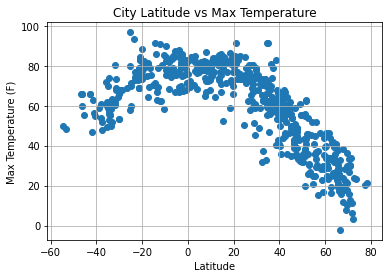

In [15]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Max Temp"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

fig.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

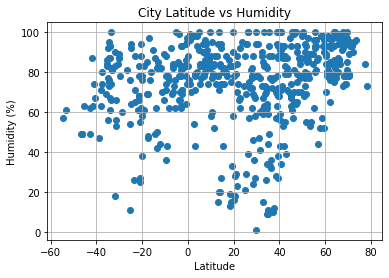

In [16]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Humidity"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
fig.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

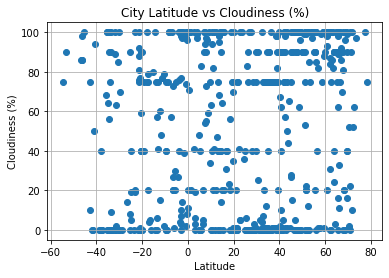

In [17]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Cloudiness"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
fig.savefig("City Latitude vs Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

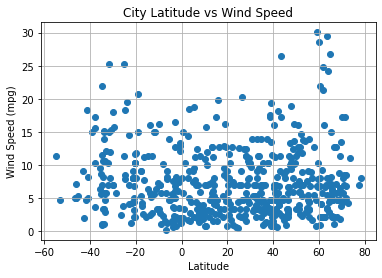

In [18]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Wind Speed"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()
plt.show()
fig.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

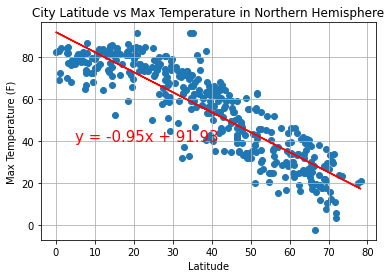

In [19]:
fig, ax=plt.subplots()
pd.to_numeric(cleaned_cities_pd["Lat"])
North_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]>0,:]
x_values = North_df["Lat"]
y_values = North_df["Max Temp"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, color='red')

plt.title("City Latitude vs Max Temperature in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(5,40), fontsize=15,color="red")
plt.grid()
plt.show()
fig.savefig("City Latitude vs Max Temperature in Northern Hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

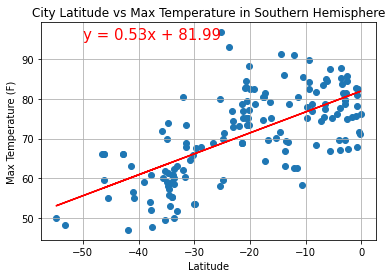

In [20]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Max Temp"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,95), fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

fig.savefig("City Latitude vs Max Temperature in Southern Hemisphere.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

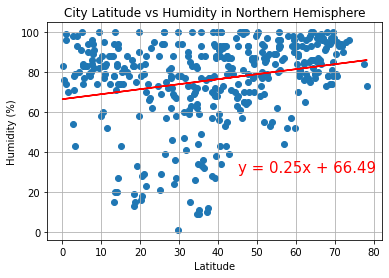

In [21]:
fig, ax=plt.subplots()

x_values = North_df["Lat"]
y_values = North_df["Humidity"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,30), fontsize=15,color="red")

plt.title("City Latitude vs Humidity in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
fig.savefig("City Latitude vs Humidity in Northern Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

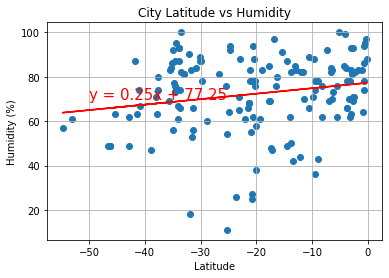

In [22]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Humidity"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,70), fontsize=15,color="red")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

fig.savefig("City Latitude vs Humidity in Southern Hemisphere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

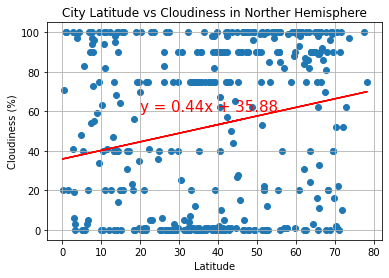

In [23]:
fig, ax=plt.subplots()

x_values = North_df["Lat"]
y_values = North_df["Cloudiness"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,60), fontsize=15,color="red")

plt.title("City Latitude vs Cloudiness in Norther Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

fig.savefig("City Latitude vs Cloudiness in Norther Hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

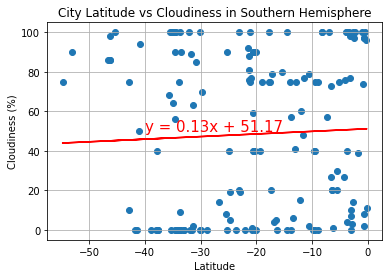

In [24]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Cloudiness"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,50), fontsize=15,color="red")

plt.title("City Latitude vs Cloudiness in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

fig.savefig("City Latitude vs Cloudiness in Southern Hemisphere.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

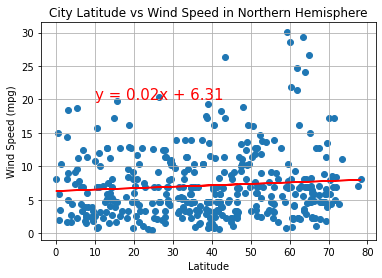

In [25]:
fig, ax=plt.subplots()

x_values = North_df["Lat"]
y_values = North_df["Wind Speed"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,20), fontsize=15,color="red")

plt.title("City Latitude vs Wind Speed in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()
plt.show()

fig.savefig("City Latitude vs Wind Speed in Northern Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

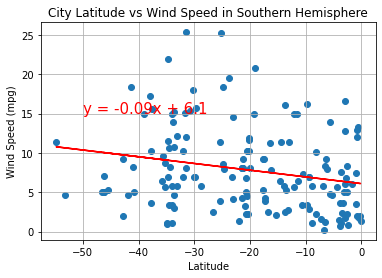

In [26]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Wind Speed"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,15), fontsize=15,color="red")

plt.title("City Latitude vs Wind Speed in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()

fig.savefig("City Latitude vs Wind Speed in Southern Hemisphere.png")